# DBSCAN 
**************************
Density-based spatial clustering of applications with noise


![](https://i.imgur.com/VKxRV83.jpg)

![](https://miro.medium.com/max/1339/0*xu3GYMsWu9QiKNOo.png)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/Sahiljosan/Machine-Learning_Practical-Implimentation/main/Agglomerative_Hierarchical_Clustering/Mall_Customer%20Dataset.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
# 2 Dimensional Array
data = df.iloc[:,[3,4]].values
data

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40],
       [17, 76],
       [18,  6],
       [18, 94],
       [19,  3],
       [19, 72],
       [19, 14],
       [19, 99],
       [20, 15],
       [20, 77],
       [20, 13],
       [20, 79],
       [21, 35],
       [21, 66],
       [23, 29],
       [23, 98]], dtype=int64)

Text(0, 0.5, 'Spending Score (1-100)')

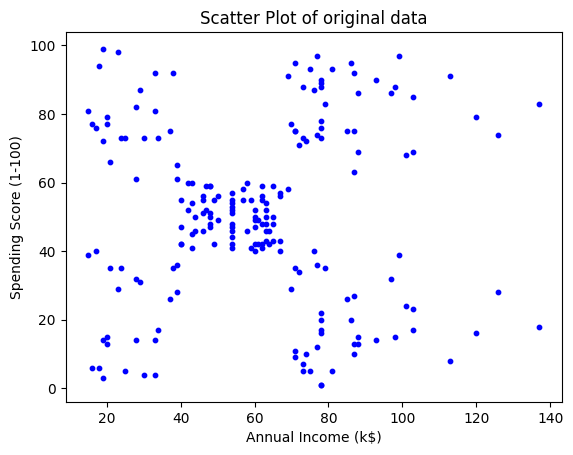

In [17]:
plt.scatter(data[:,0],data[:,1], s = 10, c = "blue")
plt.title("Scatter Plot of original data")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")

- We can see there are roughly 5 clusters
- Now we find the optimal number of clusters using `The Elbow Method`
- We will use `K-Means` algorithm to perform the `Elbow Method`
- Then we will apply the `DBscan` Algorithm

In [18]:
from sklearn.cluster import KMeans

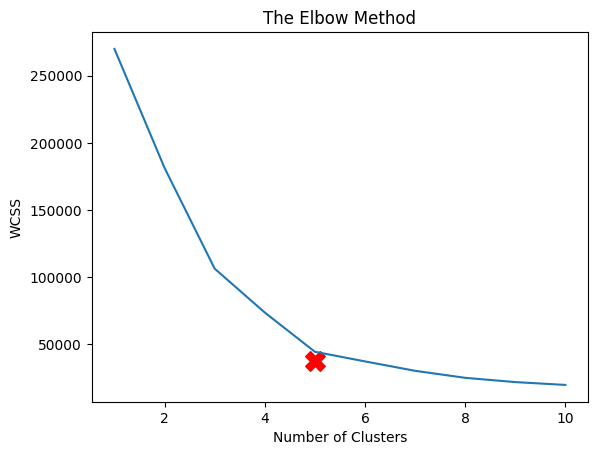

In [27]:
WCSS = []
for i in range(1,11):
    km = KMeans(n_clusters=i, init = "k-means++", max_iter = 300, n_init= 10)
    km.fit(data)
    WCSS.append(km.inertia_)
plt.plot(range(1,11),WCSS)
plt.scatter(5,WCSS[5], marker = "X", s = 200, c = "red",)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

### DSCAN Algorithm
--------------

In [28]:
from sklearn.cluster import DBSCAN

In [30]:
# Here we have to pass two parameters elsilon and minimum_pts
dbscan = DBSCAN(eps=5,min_samples=5)

In [35]:
labels = dbscan.fit_predict(data)
# Labels are the number of clusters

In [36]:
labels

array([-1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1, -1,  2, -1,  4,  3,  2,  3,  2, -1,  2,  3,  4,
        3,  2,  3,  2,  3,  4, -1,  4,  3,  4, -1,  2, -1,  4, -1,  4, -1,
        2, -1,  4,  3,  2,  3,  2, -1,  4, -1,  4, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [37]:
np.unique(labels)
# These are the clusters that we got

array([-1,  0,  1,  2,  3,  4], dtype=int64)

- Labels are the number of clusters
- This "-1" is not a cluster .. DBSCAN labels noise as -1 
- If algorithm does not find any noise in the dataset then -1 will not be seen in the labels

## Visualize Clusters, we get from DBSCAN Algorithm

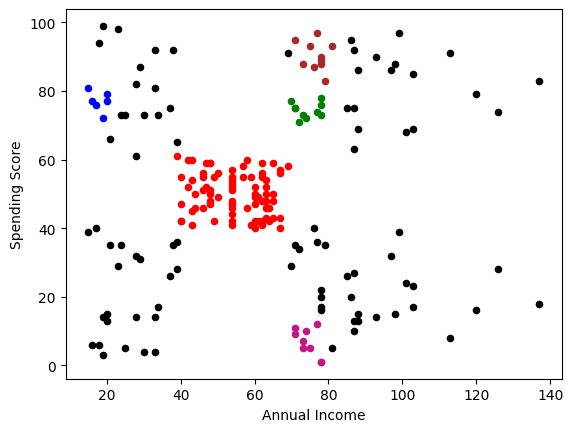

In [53]:
plt.scatter(data[labels==-1,0],data[labels == -1,1], s = 20, c = "black")
plt.scatter(data[labels==0,0],data[labels == 0,1], s = 20, c = "blue")
plt.scatter(data[labels==1,0],data[labels == 1,1], s = 20, c = "red")
plt.scatter(data[labels==2,0],data[labels == 2,1], s = 20, c = "green")
plt.scatter(data[labels==3,0],data[labels == 3,1], s = 20, c = "mediumvioletred")
plt.scatter(data[labels==4,0],data[labels == 4,1], s = 20, c = "brown")

plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()